In [1]:
import numpy as np
import matplotlib.pylab as plt
plt.style.use('ggplot')

In [2]:
def F(t):
    return np.sin(2*t) + np.cos(5*t) + 0.1*t**2

In [3]:
t = np.linspace(-10, 10, 512)
f = F(t)

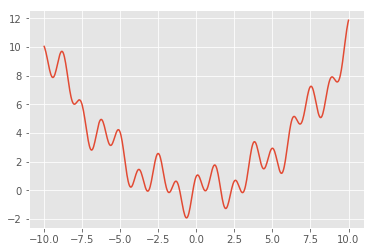

In [4]:
plt.plot(t, f)
plt.show()

In [5]:
### Annealing imitation
### Number of iterations
N  = 10000
### Start temperature
T0 = 1.
### Min energy 
E  = np.inf
### Start state
x  = 4
### fix random
np.random.seed(1)

### Annealing imitation
for k in range(N):
    ### current temperature
    T = T0 / np.log(2+k)
    ### generate new state from current state
    x_ = x + np.random.normal(loc = 0, scale = 1, size = 1)[0]
    ### energy of new state
    E_ = F(x_)
    ### if new state is better then previous 
    ### current state = this new state
    if(E_ < E):
        x = x_
        E = E_
    ### else transition in new state with some probability(Boltzman distribution, for example)
    else:
        prob = np.exp( ( E - E_ ) / T )
        if (np.random.uniform() < prob):
            x = x_

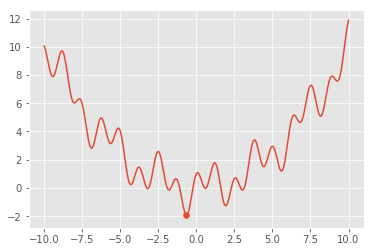

In [6]:
plt.plot(t, f)
plt.scatter(x, F(x))
plt.show()

In [7]:
np.random.seed(1)
K = 100

x = np.random.uniform(0, 10, K)
y = np.random.uniform(0, 10, K)

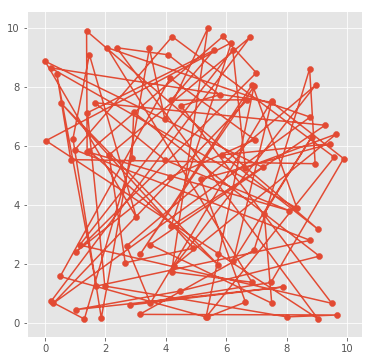

In [8]:
# random way
plt.figure(figsize = (6,6))
plt.plot(np.append(x, x[0]), np.append(y, y[0]))
plt.scatter(x, y)
plt.show()

In [9]:
def distance(x, y, inds):
    return ( (np.roll(x[inds], 1) - x[inds]) ** 2 + (np.roll(y[inds], 1) - y[inds]) ** 2 ).sum()

In [10]:
### Annealing imitation
### fix random
np.random.seed(200)
### Number of iterations
N  = 100000
### Start temperature
T0 = 1
### Min energy 
E  = np.inf
### Start state
inds  = np.arange(0, K)
inds_ = np.copy(inds) 
### Annealing imitation
for k in range(N):
    ### current temperature
    T = T0 / np.log(k+2)#(k+1)
    ### generate new state from current state
    ### inverse way from i to j point
    i = np.random.randint(0, K)
    j = np.random.randint(0, K)
    if( j < i):
        temp = i
        i = j 
        j = temp
    to_inverse = np.arange(i, j+1)
    inds_ = np.copy(inds)
    inds_[to_inverse] = np.copy(inds_[to_inverse[::-1]])
    ### energy of new state
    E_ = distance(x, y, inds_)
    ### if new state is better then previous 
    ### current state = this new state
    if(E_ < E):
        inds = np.copy(inds_)
        E = E_
    ### else transition in new state with some probability
    else:
        prob = np.exp( ( E - E_ ) / T )
        if (np.random.uniform() < prob):
            inds = np.copy(inds_)
print E

81.9620841082


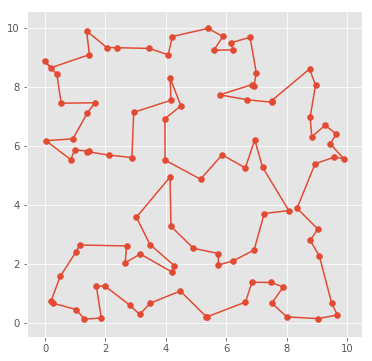

In [11]:
# suboptimal way
plt.figure(figsize=(6,6))
plt.plot(np.append(x[inds], x[inds[0]]), np.append(y[inds], y[inds[0]]))
plt.scatter(x, y)
plt.show()